In [1]:
# !pip install --upgrade pip setuptools wheel
# !pip install fiftyone

Dataset already downloaded
Loading existing dataset 'quickstart'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use



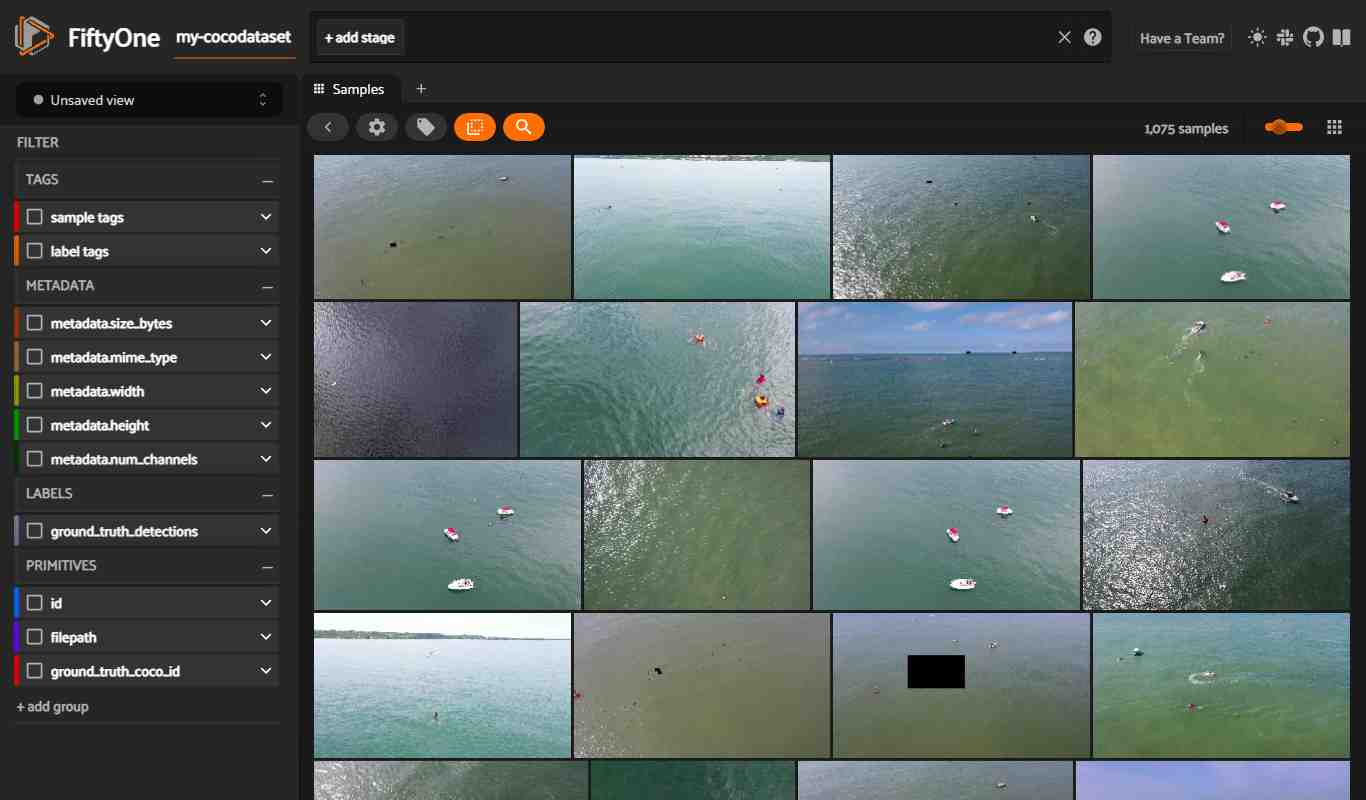

In [2]:
import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset("quickstart")
session = fo.launch_app(dataset)

In [3]:
session.close()

In [4]:
# !sahi coco fiftyone --image_dir /mnt/g/Datasets/rebalanced_2x2_train-val-OGtest.yolov5/test640x_.v2i.coco/test/ --dataset_json_path /mnt/g/Datasets/rebalanced_2x2_train-val-OGtest.yolov5/test640x_.v2i.coco/test/test640x_annotations.coco.json runs/standard_predict_json/original_640x/result.json

In [3]:
import fiftyone as fo
import fiftyone.zoo as foz
import fiftyone.utils.coco as fouc

# name = "OGTest_640x"
# dataset_dir = "/content/drive/MyDrive/tmp/DL datasets/test640x_.v2i.coco/"
# Now load ground truth labels into a new dataset
name = "my-coco-dataset2"
data_path = "datasets/rebalanced_2x2_train-val-OGtest.yolov5/test640x_.v2i.coco/test/"
labels_path = "datasets/rebalanced_2x2_train-val-OGtest.yolov5/test640x_.v2i.coco/test/test640x_annotations.coco.json"
classes= ["boat", "buoy", "jetski","life_saving_appliances","swimmer"]

# Create the dataset
coco_dataset  = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    data_path=data_path,
    labels_path=labels_path,
    label_field="ground_truth",
    name=name,
    include_id=True,
)


print(coco_dataset.default_classes)  # ['airplane', 'apple', ...]

print(coco_dataset)

 100% |███████████████| 1075/1075 [4.8s elapsed, 0s remaining, 217.6 samples/s]      
['boat', 'buoy', 'jetski', 'life_saving_appliances', 'swimmer']
Name:        my-coco-dataset2
Media type:  image
Num samples: 1075
Persistent:  False
Tags:        []
Sample fields:
    id:                      fiftyone.core.fields.ObjectIdField
    filepath:                fiftyone.core.fields.StringField
    tags:                    fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth_detections: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ground_truth_coco_id:    fiftyone.core.fields.IntField



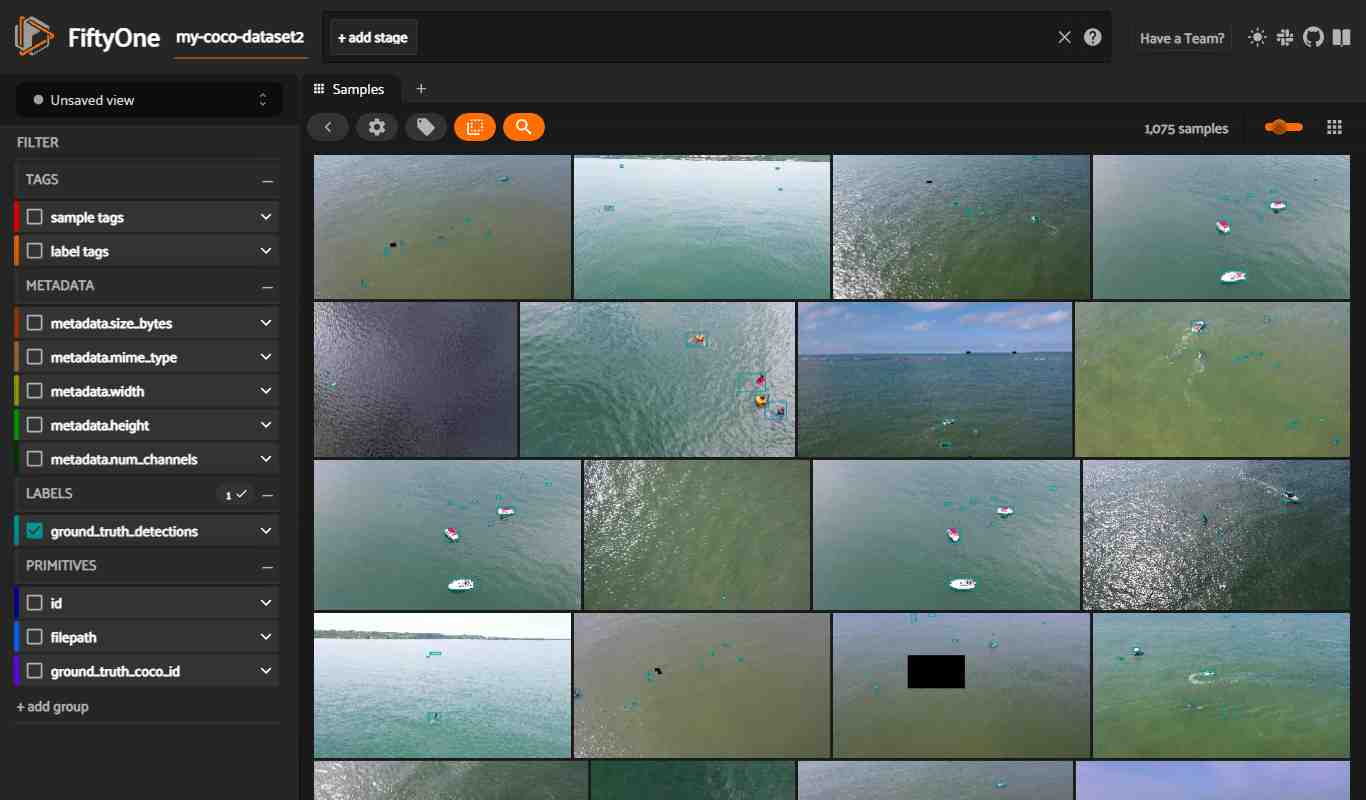

In [4]:
session = fo.launch_app(coco_dataset)

In [5]:
# And add model predictions
fouc.add_coco_labels(
    coco_dataset,
    "predictions_no_tile_640x",
    "runs/standard_predict_json/original_640x/result.json",
    classes= coco_dataset.default_classes
)

In [6]:
print(coco_dataset.default_classes)  # ['airplane', 'apple', ...]

print(coco_dataset)

['boat', 'buoy', 'jetski', 'life_saving_appliances', 'swimmer']
Name:        my-coco-dataset2
Media type:  image
Num samples: 1075
Persistent:  False
Tags:        []
Sample fields:
    id:                       fiftyone.core.fields.ObjectIdField
    filepath:                 fiftyone.core.fields.StringField
    tags:                     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                 fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth_detections:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    ground_truth_coco_id:     fiftyone.core.fields.IntField
    predictions_no_tile_640x: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [7]:
# Verify that predictions were added to two images
print(coco_dataset.count("predictions_no_tile_640x"))  

print(coco_dataset.count("ground_truth_detections"))  

1061
1075


In [8]:
session = fo.launch_app(coco_dataset)

In [9]:
# Performs an IoU sweep so that mAP and PR curves can be computed
results = coco_dataset.evaluate_detections(
    "predictions_no_tile_640x",
    gt_field="ground_truth_detections",
    compute_mAP=True,
)

print(results.mAP())
# 0.3957

plot = results.plot_pr_curves(classes=coco_dataset.default_classes)
plot.show()

Evaluating detections...
 100% |███████████████| 1075/1075 [6.0s elapsed, 0s remaining, 188.3 samples/s]      
Performing IoU sweep...
 100% |███████████████| 1075/1075 [7.5s elapsed, 0s remaining, 144.0 samples/s]      
1.9193027512142376e-05


FigureWidget({
    'data': [{'customdata': array([0.93723458, 0.        , 0.        , 0.        , 0.        , 0.        ,
                                   0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
                                   0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
                                   0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
                                   0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
                                   0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
                                   0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
                                   0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
                                   0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
                      

In [ ]:
# !pip install --upgrade pip
# !pip install 'ipywidgets<8,>=7.5'